In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Cargar dataset
df = pd.read_csv("../data/processed/features_dataset.csv")
df.head()


,UserID,MovieID,Rating,GenderBinary,AgeEncoded,OccupationEncoded,NumRatingsUser,AvgRatingUser,NumRatingsMovie,AvgRatingMovie,MainGenreEncoded,GeoCluster
0,1,1193,5,0,6,0,53,4.188679,1725,4.390725,7,0.0
1,1,661,3,0,6,0,53,4.188679,525,3.464762,2,0.0
2,1,914,3,0,6,0,53,4.188679,636,4.154088,11,0.0
3,1,3408,4,0,6,0,53,4.188679,1315,3.863878,7,0.0
4,1,2355,5,0,6,0,53,4.188679,1703,3.854375,2,0.0


In [13]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   UserID             1000209 non-null  int64  
 1   MovieID            1000209 non-null  int64  
 2   Rating             1000209 non-null  int64  
 3   GenderBinary       1000209 non-null  int64  
 4   AgeEncoded         1000209 non-null  int64  
 5   OccupationEncoded  1000209 non-null  int64  
 6   NumRatingsUser     1000209 non-null  int64  
 7   AvgRatingUser      1000209 non-null  float64
 8   NumRatingsMovie    1000209 non-null  int64  
 9   AvgRatingMovie     1000209 non-null  float64
 10  MainGenreEncoded   1000209 non-null  int64  
 11  GeoCluster         975099 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 91.6 MB


UserID                   0
MovieID                  0
Rating                   0
GenderBinary             0
AgeEncoded               0
OccupationEncoded        0
NumRatingsUser           0
AvgRatingUser            0
NumRatingsMovie          0
AvgRatingMovie           0
MainGenreEncoded         0
GeoCluster           25110
dtype: int64

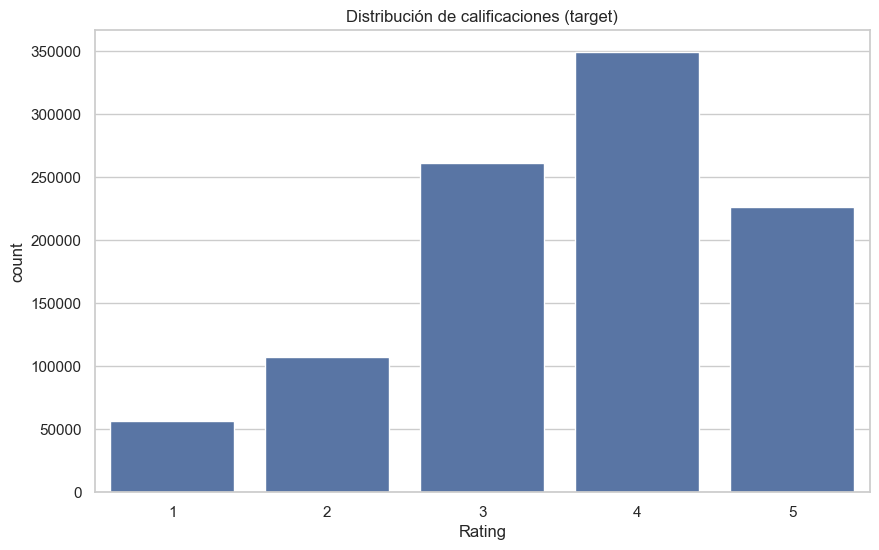

Rating
1    0.056162
2    0.107535
3    0.261142
4    0.348898
5    0.226263
Name: proportion, dtype: float64


In [14]:
sns.countplot(x="Rating", data=df)
plt.title("Distribución de calificaciones (target)")
plt.show()

print(df["Rating"].value_counts(normalize=True).sort_index())


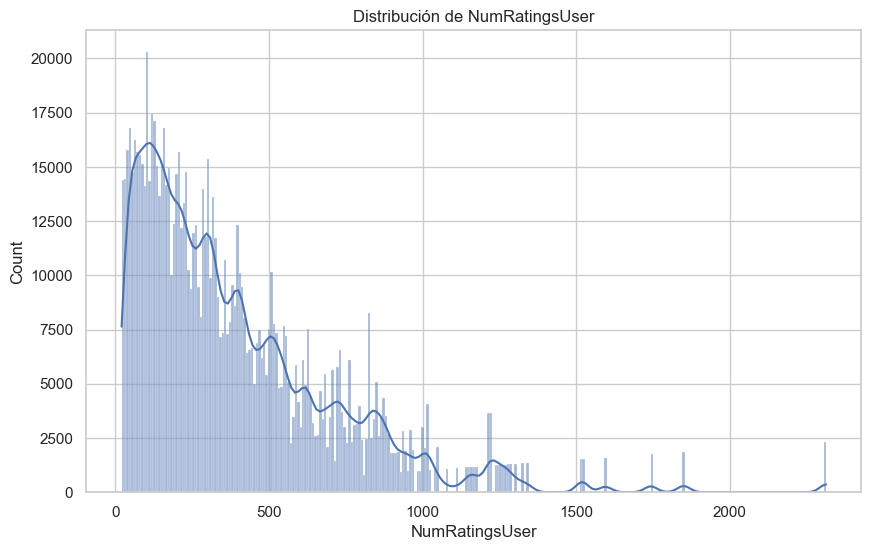

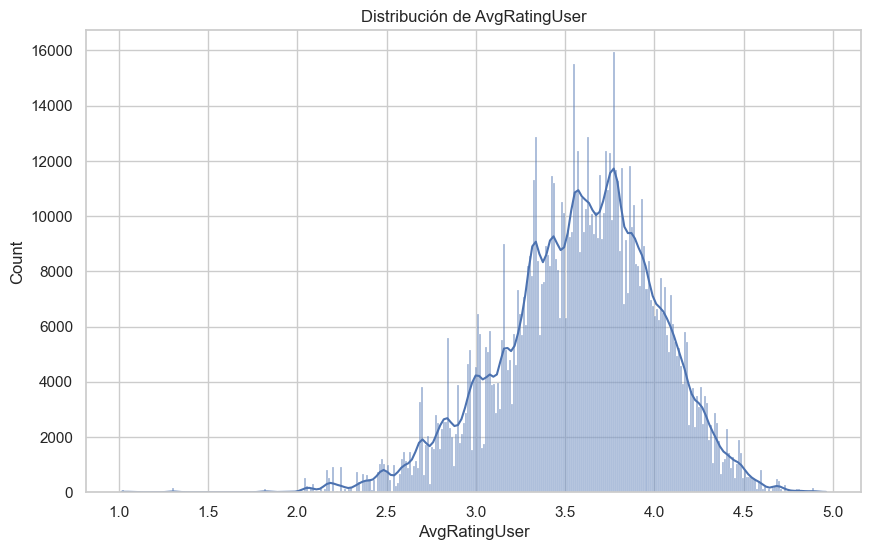

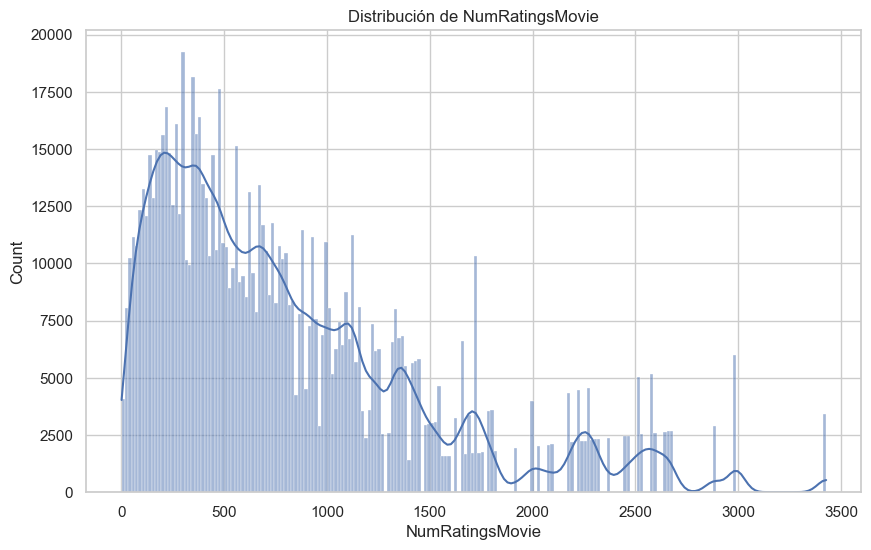

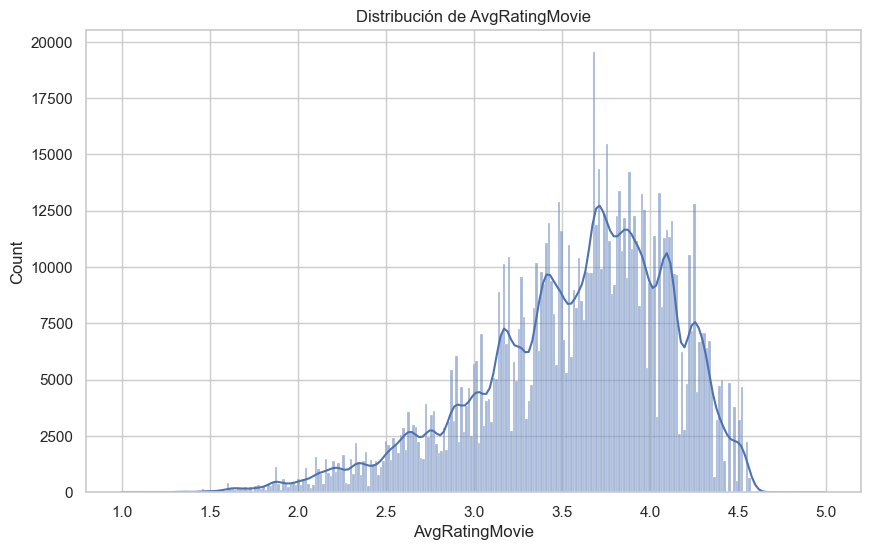

In [15]:
numeric_vars = [
    "NumRatingsUser", "AvgRatingUser",
    "NumRatingsMovie", "AvgRatingMovie"
]

for var in numeric_vars:
    sns.histplot(df[var], kde=True)
    plt.title(f"Distribución de {var}")
    plt.show()


Rating               1.000000
AvgRatingMovie       0.488549
AvgRatingUser        0.390412
NumRatingsMovie      0.254972
AgeEncoded           0.050521
MainGenreEncoded     0.041356
UserID               0.012303
GeoCluster          -0.007630
OccupationEncoded   -0.017718
GenderBinary        -0.019861
MovieID             -0.064042
NumRatingsUser      -0.121277
Name: Rating, dtype: float64


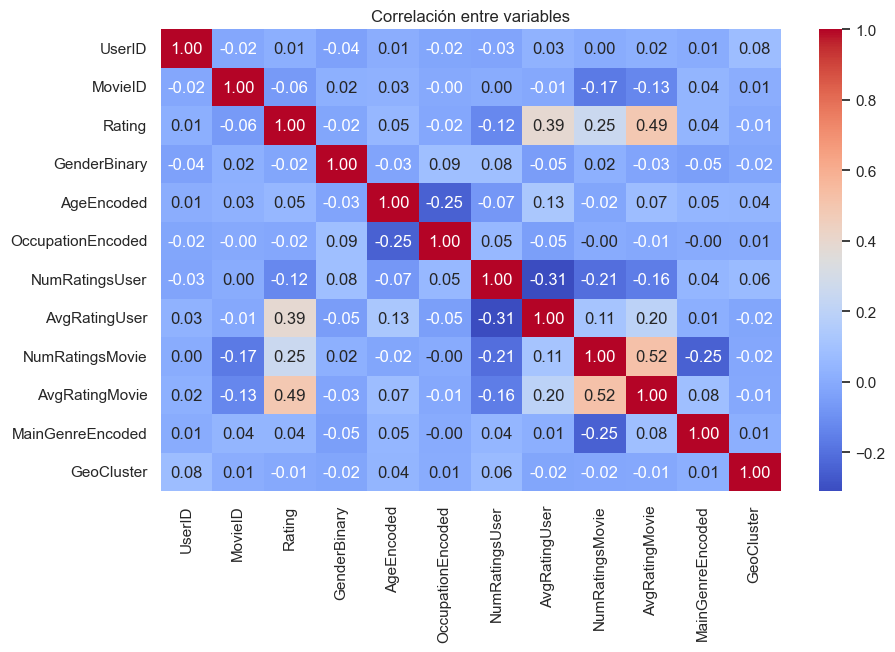

In [17]:
correlation_matrix = df.corr(numeric_only=True)
target_corr = correlation_matrix["Rating"].sort_values(ascending=False)
print(target_corr)

# Visualización completa
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre variables")
plt.show()


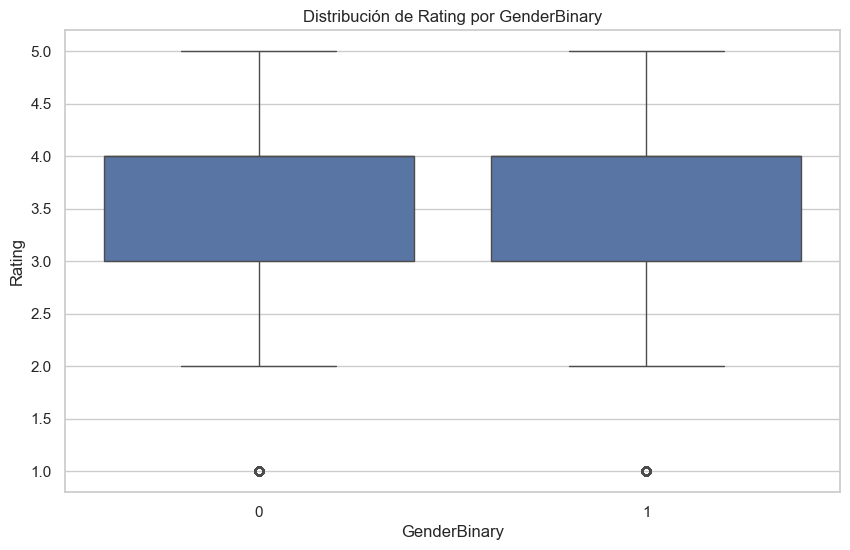

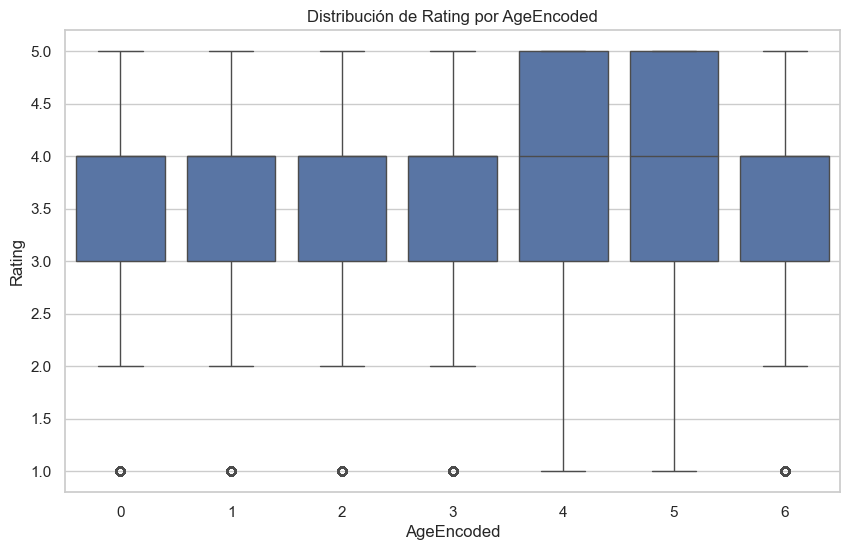

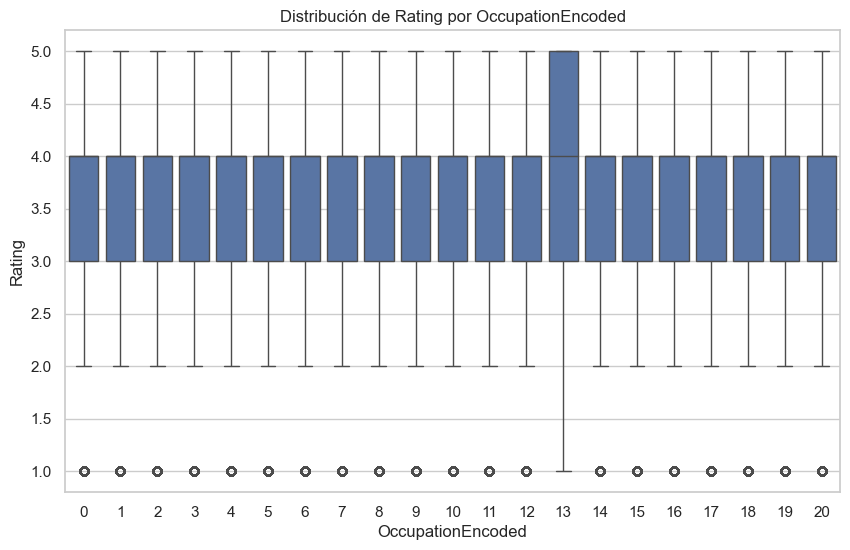

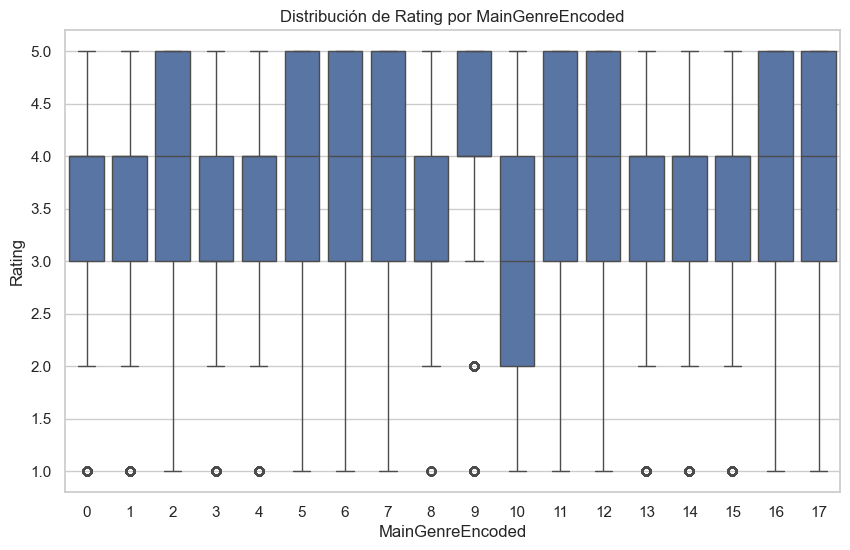

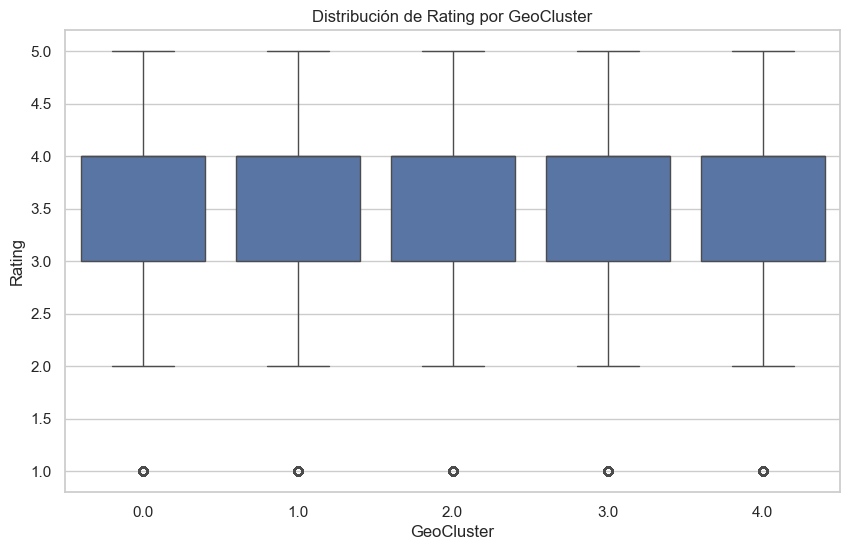

In [18]:
cat_vars = ["GenderBinary", "AgeEncoded", "OccupationEncoded", "MainGenreEncoded", "GeoCluster"]

for var in cat_vars:
    sns.boxplot(x=var, y="Rating", data=df)
    plt.title(f"Distribución de Rating por {var}")
    plt.show()


In [19]:
df["GeoCluster"].isnull().sum()
df["GeoCluster"].unique()
df["GeoCluster"].dtype


dtype('float64')

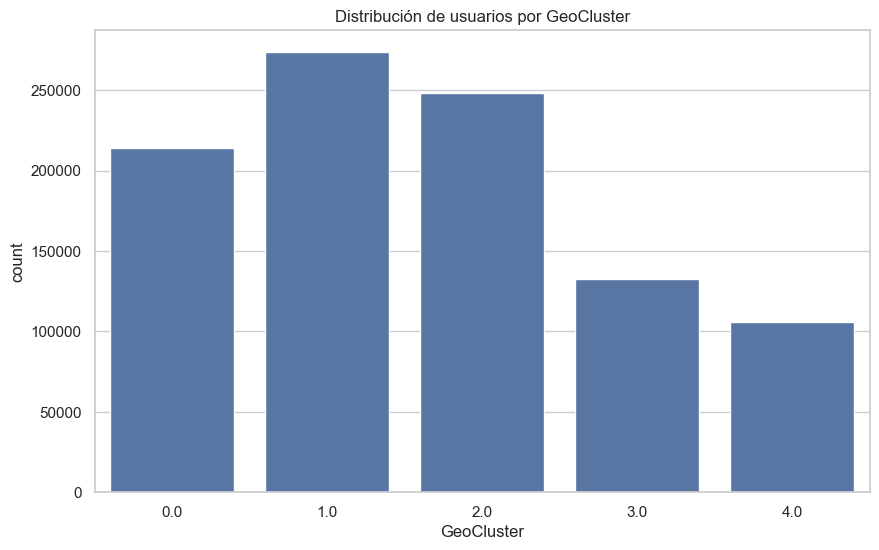

In [20]:
sns.countplot(x="GeoCluster", data=df)
plt.title("Distribución de usuarios por GeoCluster")
plt.show()


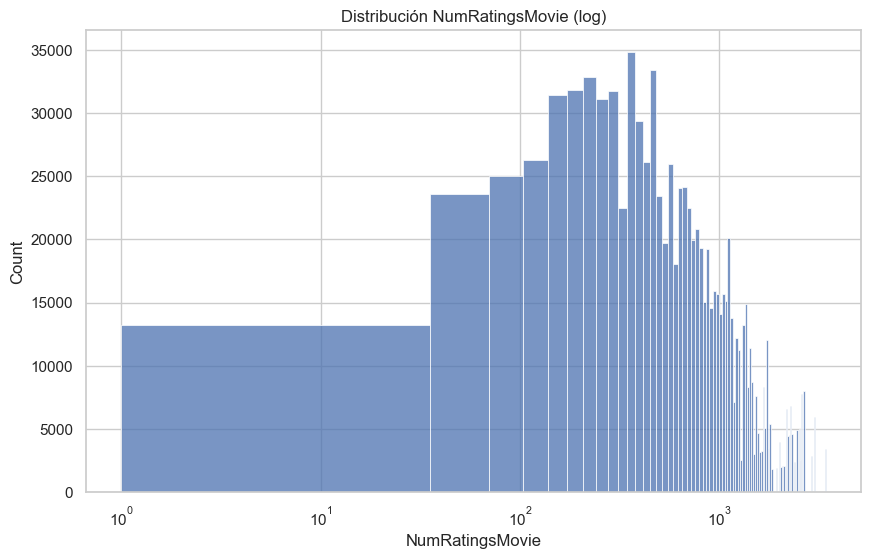

In [21]:
~~~~sns.histplot(df["NumRatingsMovie"], bins=100)
plt.xscale("log")
plt.title("Distribución NumRatingsMovie (log)")
plt.show()
